In [1]:
import json
from itertools import islice

def read_file(file):
    with open(file) as fi:
        for line in fi:
            line = line.strip()
            if not line:
                continue
            yield json.loads(line)

In [2]:
file = "/Users/ryuto/lab/research/work/ACL2020/conll/train.jsonl"

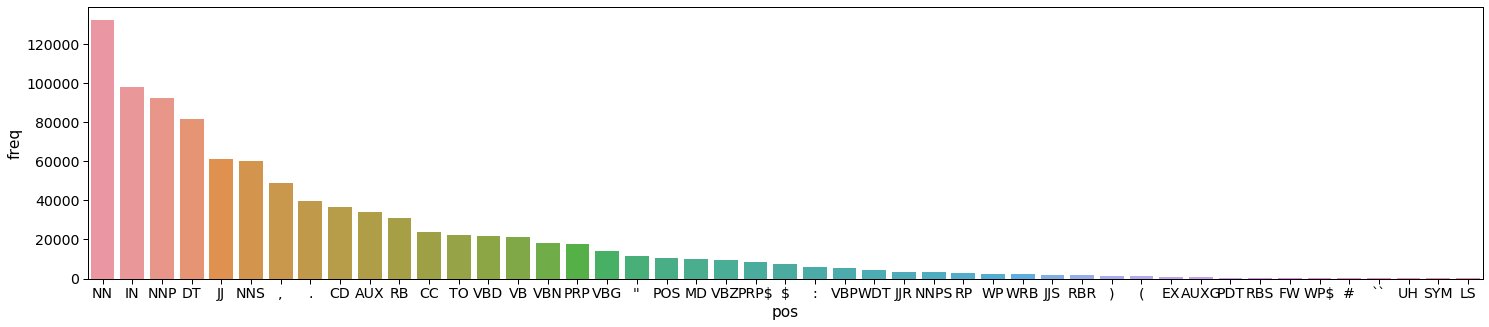

In [4]:
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

c = Counter(pos for instance in read_file(file) for pos in instance["pos_tags"])
x, y = list(zip(*c.most_common()))
df = pd.DataFrame({"pos": x, "freq": y})
plt.figure(figsize=(25,5))
sns.set_context("paper", 1.6)
sns.barplot(data=df, x="pos", y="freq")

# 品詞が全体に占める割合

In [20]:
NOUN = ["NN", "NNS", "NNP", "NNPS"]
ADJ = ["JJ", "JJR", "JJS"]
ADV = ["RB", "RBR", "RBS", "RP"]
VB = ["VB", "VBD", "VBG", "VBN", "VBP", "VBZ"]
RARE_FNC = ["LS", "SYM", "UH", "``", "#", "WP$", "FW", "PDT", "AUXG", "EX"]
SYM = ["#", "$", ".", ",", ":", "(", ")", "\"", "'", "``",  "`", "''"]

MODE = {"noun": NOUN, "adj": ADJ, "adv": ADV, "vb": VB, "fnc": NOUN + ADJ + ADV + VB,
        "low_func": RARE_FNC, "high_func": NOUN + ADJ + ADV + VB + RARE_FNC, "symbol": SYM}

In [23]:
n = sum(c.values())
for name in MODE:
    if name == "fnc" or name == "high_func":
        a = sum(v for k, v in c.most_common() if k not in MODE[name])
    else:
        a = sum(v for k, v in c.most_common() if k in MODE[name])
    print(name, a / n)

noun 0.3024331914427785
adj 0.0697558387752782
adv 0.03813361290404072
vb 0.09541087210061178
fnc 0.4942664847772908
low_func 0.0029504393554716283
high_func 0.49131604542181917
symbol 0.12180062061328718


# 述語の品詞は何？

In [27]:
c = Counter(instance["pos_tags"][arg["verb_idx"]] for instance in read_file(file) for arg in instance["labels"])
for k, v in c.most_common():
    print("{} {}".format(k, v))

VBD 21361
VB 20640
VBN 17551
VBG 13001
VBZ 9427
VBP 5299
AUX 3061
JJ 197
NN 107
AUXG 74
NNP 16
NNS 11
RB 2
IN 2
NNPS 1
